## Лабораторная работа 2.2 и 2.3
## Изучение спектров атома водорода и молекулы йода.

***Задание:***

* прокалибровать барабан спектрометра по спектрам неона и ртути
* определить координаты линий бальмеровской серии атомарного родорода; по результатам измерений рассчитать постоянную Ридберга
* определить координаты нескольких линий молекулярного спектра йода; по результатам измерений вычислить энергию колебательного кванта молекулы йода и энергию ее диссоциации в основном и возбужденном состояниях


***Градуировка спектрометра:***

In [7]:
l_neon=[5331, 5401, 5852, 5945, 6074, 6143, 6267, 6334, 6402, 6507, 6678] #в ангстремах
del_neon=[1838, 1888, 2146, 2190, 2250, 2282, 2330, 2356, 2382, 2418, 2478]

l_iod=[5791, 5770, 5461, 4916, 4358, 4047, 6907, 6234] # ангстрем
del_iod=[2126, 2104, 1936, 1508, 840, 294, 2548, 2316]


*** Спектры водорода и йода:***

In [8]:
spectr_H_del=[2438, 1452, 812, 398]
spectr_I_del=[2300, 2212, 1650]

 <center>  ***Обработка результатов***  </center> 

In [9]:
def linearfunc_koeff(x1, y1):
    sumxy=0
    sumx2=0
    sumy2=0
    sumx=0
    sumy=0
    
    n=len(x1)

    for x,y in zip(x1, y1):
        sumx+=x
        sumy+=y
        sumxy+=x*y
        sumx2+=x**2
        sumy2+=y**2

    sr_xy=sumxy/n
    sr_x2=sumx2/n
    sr_y2=sumy2/n
    srx=sumx/n
    sry=sumy/n

    b=(sr_xy-srx*sry)/(sr_x2-srx**2)
    sigmab=(1/n**0.5)*((sr_y2-sry**2)/(sr_x2-srx**2)-b**2)**0.5
    a=sry-b*srx
    sigmaa=sigmab*(sr_x2-srx**2)**0.5
    
    return (b, sigmab, a, sigmaa) #y=a+bx

*** Строим градуировочную кривую:***

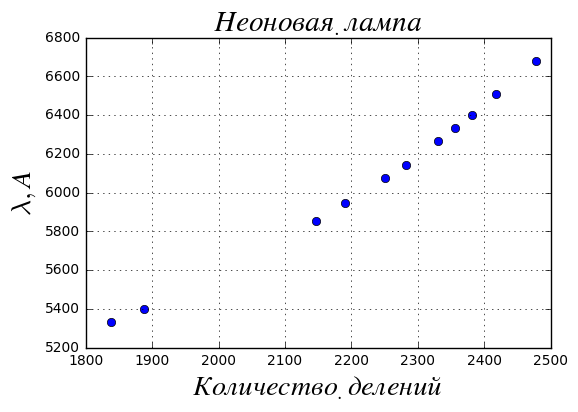

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(del_neon,l_neon, 'bo')
plt.xlabel('$Количество_. делений$',size=20)
plt.ylabel('$\lambda, А$',size=20)
plt.title('$Неоновая_. лампа$', size=21)

#Легенда
#plt.text(0.7,1600,'T=30 C',size=14)

plt.grid()
plt.show()

In [21]:
b, sigmab, a, sigmaa = linearfunc_koeff(del_neon, l_neon)

print('y={:.6} + {:.3} * x'.format(a,b))

y=1487.71 + 2.06 * x


**Определим длины волн для линий водорода:**

In [24]:
spectr_H_del=np.array(spectr_H_del)
spectr_H= spectr_H_del*2.06 + 1487.71 
print(spectr_H)

[ 6509.99  4478.83  3160.43  2307.59]


**Убедимся в том, что отношение длин волн водородных линий соответствуют формуле сериальной закономерности:**

${\displaystyle {\frac {1}{\lambda_{mn} }}=RZ^{2}\left({\frac {1}{n^{2}}}-{\frac {1}{m^{2}}}\right)}$

R- постоянная Ридберга

Мы будем исследовать серию Бальмера. Она соответствует $n = 2$ и $m$ от $n+1$ до $\infty$. Для 3, 4, 5, 6 линии обозначаются соответственно $H_\alpha, H_\beta, H_\gamma, H_\delta$

In [31]:
otn_spectr_H=[]
for i in range(3):
    otn_spectr_H.append(spectr_H[i+1]/spectr_H[i])
print(otn_spectr_H)

otn_theor=[]
for m in range(3, 6):
    otn_theor.append((1/4-1/m**2)/(1/4-1/(m+1)**2))
print(otn_theor)

[0.68799337633391144, 0.70563740976996236, 0.73015064405792884]
[0.7407407407407408, 0.8928571428571429, 0.9450000000000001]


Видно, что отношения длин волн примерно соответствуют теоретическим.

**Для каждой из наблюдаемых линий Н вычислим значение постоянной Ридберга, определим ее среднее значение по всем измерениям и оценим погрешность измерения. Сравним результат опыта с расчетным значением R.**

In [39]:
R=[]
for i in range(4):
    R.append(1/(spectr_H[i] *(1/4-1/(3+i)**2) )) #в 1/ангстрем
    
R=np.array(R)
R=R*10**(10) #в 1/м
print(R) 

[ 11059924.82323322  11907871.77305978  15067268.57391166
  19500864.53832787]


In [48]:
R_mean=sum(R)/4
print(R_mean)

sigma_R=np.sqrt((1/3)*sum((np.array(R)-R_mean)*(np.array(R)-R_mean)))
print(sigma_R)

14383982.4271
3822296.23061


Вывод:

$R=(1.4 \pm 0.4) 10^{7}$ $м^{-1}$

$R_{теор} = 10973731.568508(65) м^{−1}$

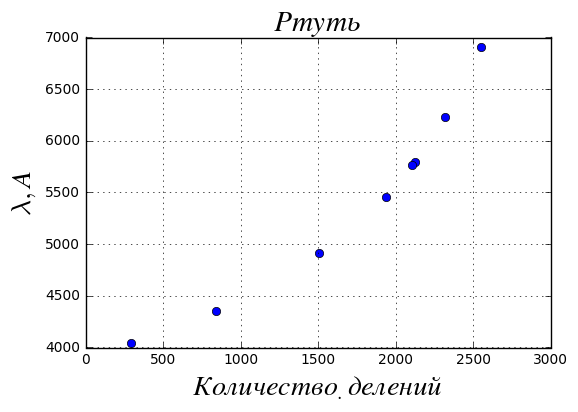

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(del_iod,l_iod, 'bo')
plt.xlabel('$Количество_. делений$',size=20)
plt.ylabel('$\lambda, А$',size=20)
plt.title('$Ртуть$', size=21)

#Легенда
#plt.text(0.7,1600,'T=30 C',size=14)

plt.grid()
plt.show()

***Определим длины волн линий поглощения йода, соответствующие делениям барабана монохроматора $n_{1,0}, n_{1,5}, n_{гр}$:***

In [51]:
spectr_I=[6200, 6000, 5100] # в А
# определим погрешности
sigma_spectr_I=[50, 50, 50]

**Вычислим (в эВ) энергию колебательного кванта возбужденного состояния молекулы йода:**

$\displaystyle h\nu_2 = \frac{h\nu_{1,5}-h\nu_{1,0}}{5}$

$\displaystyle h \nu = \frac{hc}{\lambda}$

In [54]:
E_I=4.136*10**(-15)*3*10**(10)*(1/6000-1/6200)*10**(8)/5
sigma_E_I=(4.136*10**(-15)*3*10**(10)/5)*np.sqrt((50/6000)**2/(6000**2*10**(-16))+(50/6200)**2/(6200**2*10**(-16)))
print(E_I, sigma_E_I)

0.013341935483870956 0.00472215730144


$\displaystyle h\nu_2 = (0.013 \pm 0.004) $ эВ

** Используя полученные в работе результаты, а также данные о том, что энергия колебательного кванта основного состояния $h\nu_1=0.027$ эВ, а энергия возбуждения атома $E_A=0.94 $ эВ, вычислим:**
* энергию электронного перехода $h\nu_{эл}$
* энергию диссоциации молекулы в основном состоянии $Д_1$
* энергию диссоциации молекулы в возбужденном состоянии $Д_2$

Энергия диссоциации: $\displaystyle h\nu_{гр}=h\nu_e + D'= E_a+D$

где $E_a$ - энергия возбуждения атома, D и D' - энергия диссоциации в нормальном и возбужденном состоянии соответственно.

Оптические переходы в молекулах соответствуют переходам между различными электронными состояниями в молекулах. При этом происходят изменения колебательного и вращательного состояний. В видимой области наблюдаются электронно-колебательные спектры молекул. В данной работе изучается серия Деландра:

$\displaystyle h\nu_{0, n2}=h\nu_e + h\nu_2 (n_2 + \frac{1}{2})-\frac{1}{2} h\nu_{кол}$

=> $\displaystyle h\nu_e = -h\nu_{1, 0} +\frac{1}{2}h\nu_{кол} - \frac{3}{2}h\nu_2 $

In [59]:
E_10=4.136*10**(-15)*3*10**(10)*(1/6200)*10**(8)
sigma_E_10=(4.136*10**(-15)*3*10**(10)/5)*np.sqrt((50/6200)**2/(6200**2*10**(-16)))
print(E_10, sigma_E_10)

2.0012903225806453 0.00322788761707


In [60]:
E_el=2.001+0.027/2-3*0.013/2
sigma_E_el=np.sqrt(0.003**2+(9/4)*0.004)
print(E_el, sigma_E_el)

1.9949999999999999 0.0949157521173


In [61]:
#hгр
E_gr=4.136*10**(-15)*3*10**(10)*(1/5100)*10**(8)
sigma_E_gr=(4.136*10**(-15)*3*10**(10)/5)*np.sqrt((50/5100)**2/(5100**2*10**(-16)))
print(E_gr, sigma_E_gr)


2.4329411764705884 0.00477047289504


In [62]:
D1=2.433-1.995
sigma_D1=np.sqrt(0.004**2+0.10**2)
print(D1, sigma_D1)

0.4379999999999997 0.100079968026


In [63]:
D2=2.433-0.94
sigma_D2=np.sqrt(0.004**2)
print(D2, sigma_D2)

1.4929999999999999 0.004
